In [32]:
"""
Load:
  x_a_init.txt
Save:
  x_b.txt
  x_a.txt
"""
import numpy as np
from scipy.integrate import ode
import lorenz96
import matplotlib.pyplot as plt
from settings import *
import matplotlib.pyplot as plt
nT = 800
k_n = 10 #ensemble amount

In [ ]:
#copy from OI 
def OI(B,x_a_save,Ts,Ta,x_b_save,tt,y_o_save):
    #--------------
    # forecast step
    #--------------

    solver = ode(lorenz96.f).set_integrator('dopri5')
    solver.set_initial_value(x_a_save[tts], Ts).set_f_params(F)
    solver.integrate(Ta)
    x_b_save = np.vstack([x_b_save, [solver.y]])
    #--------------
    # analysis step
    #--------------

    # background
    x_b = x_b_save[tt].transpose()

    # observation

    # innovation
    y_o = y_o_save[tt].transpose()
    H = np.identity(40)
    y_b = np.dot(H, x_b)
    d = y_o - y_b

    # analysis scheme 
    K = np.dot(B, np.dot(H, np.linalg.inv(np.dot(H, np.dot(B,H))+R)))

    x_a = x_b + np.dot(K,d)
    
    #x_a_save = np.vstack([x_a_save, x_a.transpose()])
    return x_a

In [55]:
k=0
#set random seed
np.random.seed(201910)

#load true value
x_t_save = np.genfromtxt('x_t.txt')

# load initial condition
x_a_init = np.genfromtxt('x_a_init.txt')
analysis_error = 25.e-2
#x_a_init = np.genfromtxt('x_t.txt')[800] + analysis_error * np.random.randn(N)  # using nature run value plus a small error (for test purpose)
#Load B
B = np.genfromtxt('B.txt')
np.random.seed(20191031)
# create observations

observation_error = 25.e-2
y_o_save = np.zeros([nT+1, N])
y_o_save = x_t_save + observation_error * np.random.randn(nT+1, N)

np.random.seed(20191130+k)
y_o_k_save = y_o_save + observation_error * np.random.randn(nT+1, N)


# initial x_b: no values at the initial time (assign NaN)
x_b_save = np.full((1,1,N), np.nan, dtype='f8')

# initial x_a: from x_a_ens_init

x_a_save = np.array([x_a_init])


tt = 1
R = 0.25 * np.identity(40) #observation error covariance

#print(x_b_save.shape)
while tt <= 1:#nT:
    tts = tt - 1
    Ts = tts * dT  # forecast start time
    Ta = tt  * dT  # forecast end time (DA analysis time)
    print('Cycle =', tt, ', Ts =', round(Ts, 10), ', Ta =', round(Ta, 10))

    
    
    
    #poll
    
    
    

    x_a_k_save = x_a_save.copy()
    
    
    for k in range(k_n):
        
        #--------------
        # forecast step
        #--------------
        ensemble_error = 12.e-2
        np.random.seed(20181130+k)
        x_b_k_save = np.zeros([1,40])
        
        #x_b_k_save = np.reshape([],[1,40])
        print(x_b_k_save.shape)
        solver = ode(lorenz96.f).set_integrator('dopri5')
        solver.set_initial_value(x_a_save+ensemble_error*np.random.randn(N), Ts).set_f_params(F)
        solver.integrate(Ta)
        
        
        x_b_k_save[0][:] = [solver.y]#np.vstack([x_b_k_save, [solver.y]])
        print(x_b_k_save.shape)
        #x_b_save = np.concatenate((x_b_save, np.reshape([solver.y],[1,1,40])), axis = 1)

        #--------------
        # analysis step
        #--------------
    
        # background
        x_b = np.dsplit(x_b_save,1)[0][0].transpose()
    
        # observation
    
        # innovation
        y_o = y_o_save[tt].transpose()
        H = np.identity(40)
        y_b = np.dot(H, x_b)
        d = y_o - y_b

        # analysis scheme 
        K = np.dot(B, np.dot(H, np.linalg.inv(np.dot(H, np.dot(B,H))+R)))
    
        x_a = x_b + np.dot(K,d)
        #x_a = (x_b + y_o)/2
        
        x_a_save = np.vstack([x_a_save, x_a.transpose()])
    
    tt += 1


# save background and analysis data
#np.savetxt('x_b.txt', x_b_save)
#np.savetxt('x_a.txt', x_a_save)

Cycle = 1 , Ts = 0.0 , Ta = 0.05
(1, 40)


/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: input is not consistent
  self.messages.get(istate, unexpected_istate_msg)))


ValueError: setting an array element with a sequence.

In [29]:
print(np.dsplit(x_b_save,1)[0][0].shape)



(1, 40)


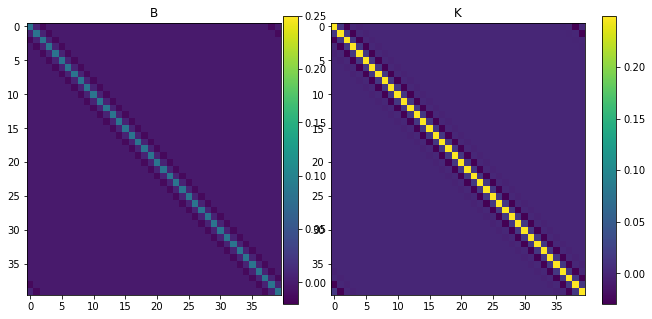

In [2]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(121)
ax.set_title('B')
plt.imshow(B,vmin=-0.02,vmax=0.25)
ax.set_aspect('auto')
cax = fig.add_axes([0.26, 0.1, 0.26, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

ax2 = fig.add_subplot(122)
ax2.set_title('K')
plt.imshow(K)
ax2.set_aspect('auto')

cax = fig.add_axes([0.26, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

plt.show()

In [96]:
#for i in range(10):
#    plt.plot(x_a_save[:][i])
#    #print(x_a_save[:][200])
#    plt.show()

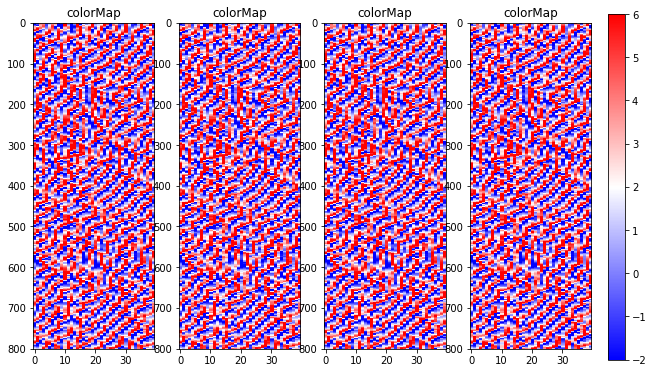

In [97]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(141)
ax.set_title('colorMap')
plt.imshow(x_t_save, cmap = "bwr", vmin=-2, vmax=6)
ax.set_aspect('auto')

ax2 = fig.add_subplot(142)
ax2.set_title('colorMap')
plt.imshow(y_o_save, cmap = "bwr", vmin=-2, vmax=6)
ax2.set_aspect('auto')


ax3 = fig.add_subplot(143)
ax3.set_title('colorMap')
plt.imshow(x_a_save, cmap = "bwr", vmin=-2, vmax=6)
ax3.set_aspect('auto')


ax4 = fig.add_subplot(144)
ax4.set_title('colorMap')
plt.imshow(x_b_save, cmap = "bwr", vmin=-2, vmax=6)
ax4.set_aspect('auto')


cax = fig.add_axes([0.26, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

plt.show()